Necessary imports:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

Implemented gradients:

In [6]:
def hsv2rgb(h, s, v): # supporting function converting hsv to rgb
    hsv = np.zeros(shape=(1, 3), dtype=float)
    hsv[0, 0] = h
    hsv[0, 1] = s
    hsv[0, 2] = v
    rgb = colors.hsv_to_rgb(hsv)
    r, g, b = rgb[0, 0], rgb[0, 1], rgb[0, 2]
    return (r, g, b)

# gradients

def gradient_rgb_bw(v):
    return (v, v, v)


def gradient_rgb_gbr(v):
    red = 0
    green = 0
    blue = 0

    if v <= 1/2:
        green = 1 - (v * 2)
        blue = 2 * v
    else:
        red = (v * 2) - 1
        blue = 2 - (v * 2)

    return (red, green, blue)


def gradient_rgb_gbr_full(v):
    red = 0
    green = 0
    blue = 0

    if v <= 0.25:
        green = 1
        blue = v * 4
    elif v <= 0.5:
        green = 2 - (v * 4)
        blue = 1
    elif v <= 0.75:
        red = (v * 4) - 2
        blue = 1
    else:
        red = 1
        blue = 4 - (v * 4)

    return (red, green, blue)


def gradient_rgb_wb_custom(v):
    red = 1
    green = 1
    blue = 1

    if v <= 1/7:
        green = 1 - (v * 7)
    elif v <= 2/7:
        red = 2 - (v * 7)
        green = 0
    elif v <= 3/7:
        red = 0
        green = (v * 7) - 2
    elif v <= 4/7:
        red = 0
        blue = 4 - (v * 7)
    elif v <= 5/7:
        red = (v * 7) - 4
        blue = 0
    elif v <= 6/7:
        green = 6 - (v * 7)
        blue = 0
    else:
        red = 7 - (v * 7)
        green = 0
        blue = 0

    return (red, green, blue)


def gradient_hsv_bw(v):
    return hsv2rgb(0, 0, v)


def gradient_hsv_gbr(v):
    return hsv2rgb(1/3 + (v * 2)/3, 1, 1)


def gradient_hsv_unknown(v):
    return hsv2rgb(1/3 - v/3, 1/2, 1)


def gradient_hsv_custom(v):
    return hsv2rgb(v, 1 - v, 1)

Supporting functions used for drawing the plot:

In [7]:
def get_name(gradient):
    return gradient.__name__.replace('gradient_', '').replace('_', '-').upper()

def draw_plot(gradients, names):
    # plt.rc('text', usetex=True) 
    # plt.rc('font', family='serif', serif=['Times'], size=10)
    plt.rc('legend', fontsize=10)

    column_width_pt = 400 # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3] / 2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('gradients.pdf')

Main function:

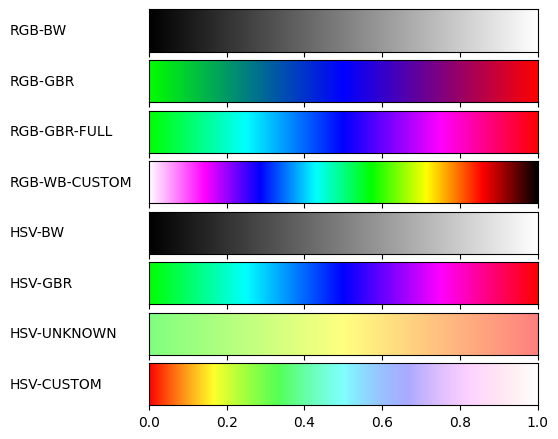

In [8]:
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

draw_plot(gradients, [get_name(g) for g in gradients])